In [1]:
from __future__ import division
import random
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
number_cluster = 4
number_points = 100
xmin, ymin = -10.0, -10.0
xmax, ymax = 10.0, 10.0
radius = 1.0
dx, dy = (xmax-xmin) / number_cluster, (ymax - ymin) / number_cluster

In [3]:
cluster_centers = [(xmin + ix * dx, ymin + iy * dy) for ix in range(number_cluster) for iy in range(number_cluster)]

In [4]:
mean = [0, 0]
cov = [[0.5, 0], [0, 0.5]]

In [5]:
data = []
for params in cluster_centers:
    x0, y0 = np.random.multivariate_normal(mean, cov, number_points).T
    data.extend(zip(map(lambda x: float(x + params[0]), list(x0)), map(lambda x: float(x + params[1]), list(y0))))

In [6]:
xcoor, ycoor = [], []
for tp in data:
    xcoor.append(tp[0])
    ycoor.append(tp[1])

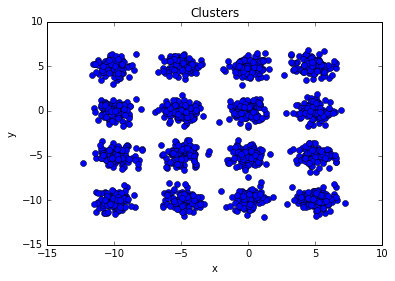

In [7]:
fig, ax = plt.subplots()
ax.plot(xcoor, ycoor, 'o');
ax.set_title("Clusters")
ax.set_xlabel("x")
ax.set_ylabel("y")

In [8]:
df = spark.createDataFrame(data, ["x", "y"])

In [9]:
df.show(5)

+-------------------+-------------------+
|                  x|                  y|
+-------------------+-------------------+
|-11.190144486610052|-10.220825996268335|
| -9.820470390950234|-10.891646325516003|
| -8.520313537853365| -9.464748131650905|
|-10.194740750634436| -9.609229567538602|
| -10.04402486716295|-10.781944573746626|
+-------------------+-------------------+
only showing top 5 rows



In [10]:
df.write.parquet("/home/mahjoubi/Documents/Spark_Scala/data/clustering")

AnalysisException: u'path file:/home/mahjoubi/Documents/Spark_Scala/data/clustering already exists.;'